In [1]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
csvpath = '/net/birdstore/Active_Atlas_Data/data_root/atlas_data/atlasV8/csv'

In [14]:
df_midbrain_distance = pd.read_csv(os.path.join(csvpath, 'using_midbrain_distance.csv'))
df_midbrain_allen = pd.read_csv(os.path.join(csvpath, 'using_midbrain_allen.csv'))
df_midbrain_atlas = pd.read_csv(os.path.join(csvpath, 'using_midbrain_atlas.csv'))

In [15]:
df_all_distance = pd.read_csv(os.path.join(csvpath, 'using_all_distance.csv'))
df_all_allen = pd.read_csv(os.path.join(csvpath, 'using_all_allen.csv'))
df_all_atlas = pd.read_csv(os.path.join(csvpath, 'using_all_atlas.csv'))

In [16]:
df_brainstem_distance = pd.read_csv(os.path.join(csvpath, 'using_brainstem_distance.csv'))
df_brainstem_allen = pd.read_csv(os.path.join(csvpath, 'using_brainstem_allen.csv'))
df_brainstem_atlas = pd.read_csv(os.path.join(csvpath, 'using_brainstem_atlas.csv'))

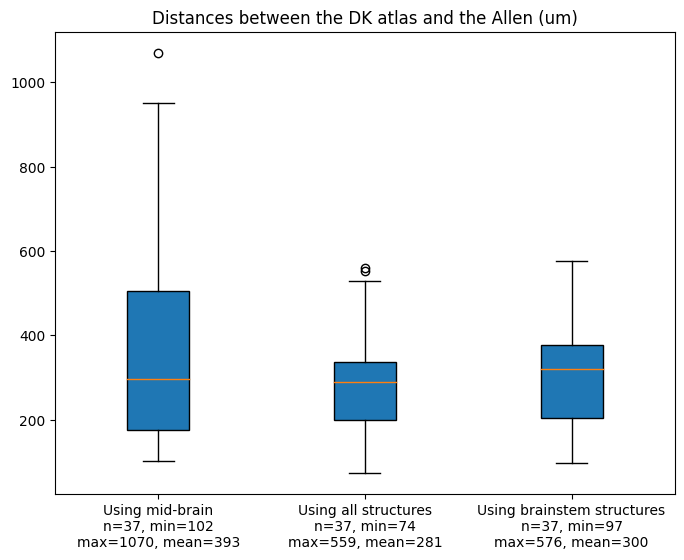

In [17]:
midbrain_distances = df_midbrain_distance.distance
all_distances = df_all_distance.distance
brainstem_distances = df_brainstem_distance.distance
fig, ax = plt.subplots(figsize=(8, 6))
columns = [midbrain_distances, all_distances, brainstem_distances]
ax.boxplot(columns, patch_artist=True)
ax.set_title("Distances between the DK atlas and the Allen (um)")
title1 = f"Using mid-brain\nn={len(midbrain_distances)}, min={round(min(midbrain_distances))}"
title1 += f"\nmax={round(max(midbrain_distances))}, mean={round(np.mean(midbrain_distances))}"
title2 = f"Using all structures\nn={len(all_distances)}, min={round(min(all_distances))}"
title2 += f"\nmax={round(max(all_distances))}, mean={round(np.mean(all_distances))}"
title3 = f"Using brainstem structures\nn={len(brainstem_distances)}, min={round(min(brainstem_distances))}"
title3 += f"\nmax={round(max(brainstem_distances))}, mean={round(np.mean(brainstem_distances))}"
plt.xticks([1,2,3], [title1, title2, title3])
plt.show()

In [7]:
len(all_distances), min(all_distances), max(all_distances), np.mean(all_distances)

(37, 73.76719426638469, 558.8457401084643, 280.9093727244146)

In [8]:
for i, row in df_midbrain_distance.iterrows():
    print(f'{row[0]} distance={round(row[1],2)}')

PBG_R distance=101.85
IC distance=109.59
SNR_R distance=131.25
4N_L distance=132.3
3N_L distance=142.01
SC distance=150.28
3N_R distance=154.77
SNR_L distance=165.17
PBG_L distance=171.95
4N_R distance=174.67
LC_L distance=181.04
SNC_L distance=191.85
LC_R distance=195.35
VLL_R distance=200.09
7n_R distance=212.8
5N_L distance=228.29
5N_R distance=287.54
6N_L distance=293.78
6N_R distance=295.69
SNC_R distance=324.19
7n_L distance=348.94
VLL_L distance=349.66
RtTg distance=351.04
DC_L distance=470.06
Sp5O_L distance=480.76
7N_L distance=487.7
Sp5O_R distance=500.22
DC_R distance=505.38
Amb_L distance=511.88
AP distance=580.28
Amb_R distance=672.78
LRt_L distance=810.68
Sp5I_L distance=856.75
Sp5I_R distance=861.62
LRt_R distance=895.75
Sp5C_L distance=950.16
7N_R distance=1070.13


In [ ]:
for i, row in df_brainstem_distance.iterrows():
    print(f'<tr><td>{row[0]}</td> <td>{round(row[1],2)}</td></tr>')

In [9]:
xmin = 8000
xmax = 13000
ymin = 2000
ymax = 6000
zmin = 0
zmax = 25*456

In [20]:
df_midbrain_atlas.head()

,Structure,xyz,S,area,X,Y,Z
0,3N_L,[9034.3336986 3911.49638033 5563.39094212],Left,midbrain,9034.333699,3911.496380,5563.390942
1,3N_R,[9076.3591288 3946.30749337 5867.90304448],Right,midbrain,9076.359129,3946.307493,5867.903044
2,4N_L,[9595.80168412 3897.20550949 5375.90499176],Left,midbrain,9595.801684,3897.205509,5375.904992
3,4N_R,[9584.65696263 3949.4439607 5951.34021413],Right,midbrain,9584.656963,3949.443961,5951.340214
4,5N_L,[10325.91556512 5112.35876931 4027.46983528],Left,brainstem,10325.915565,5112.358769,4027.469835


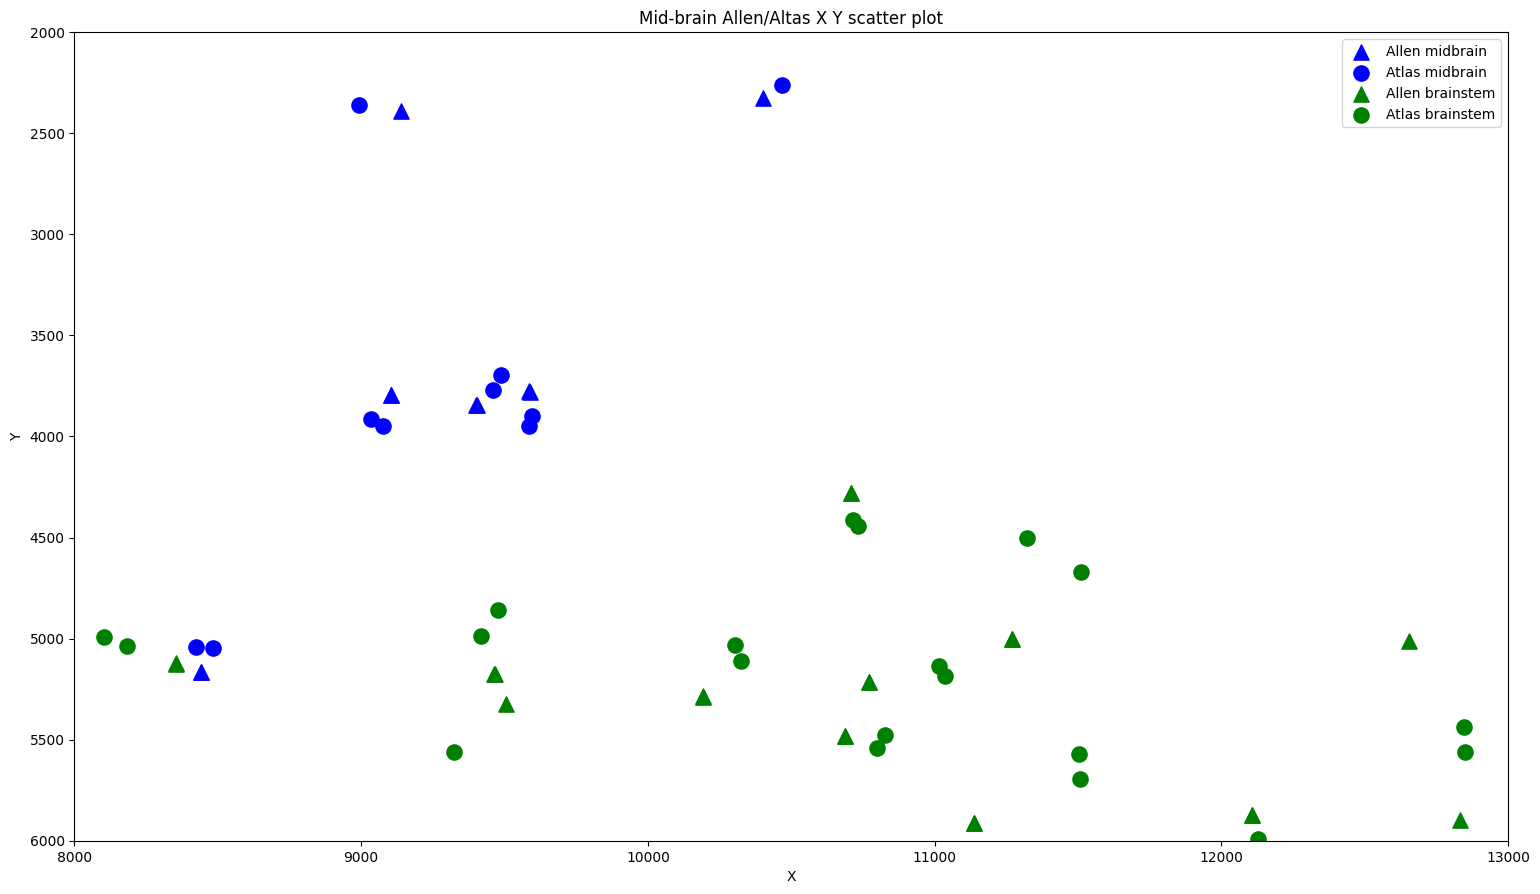

In [22]:
for color, label in zip('bg', ['midbrain', 'brainstem']):
    allen_subset = df_midbrain_allen[df_midbrain_allen.area == label]
    atlas_subset = df_midbrain_atlas[df_midbrain_atlas.area == label]
    plt.scatter(allen_subset.X, allen_subset.Y, s=120, marker='^', c=color, label=str('Allen ' + label))
    plt.scatter(atlas_subset.X, atlas_subset.Y, s=120, marker='o', c=color, label=str('Atlas ' + label))
    plt.xlabel('X')
    plt.ylabel('Y')
    ax = plt.gca()
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.invert_yaxis()
plt.title('Mid-brain Allen/Altas X Y scatter plot')    
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

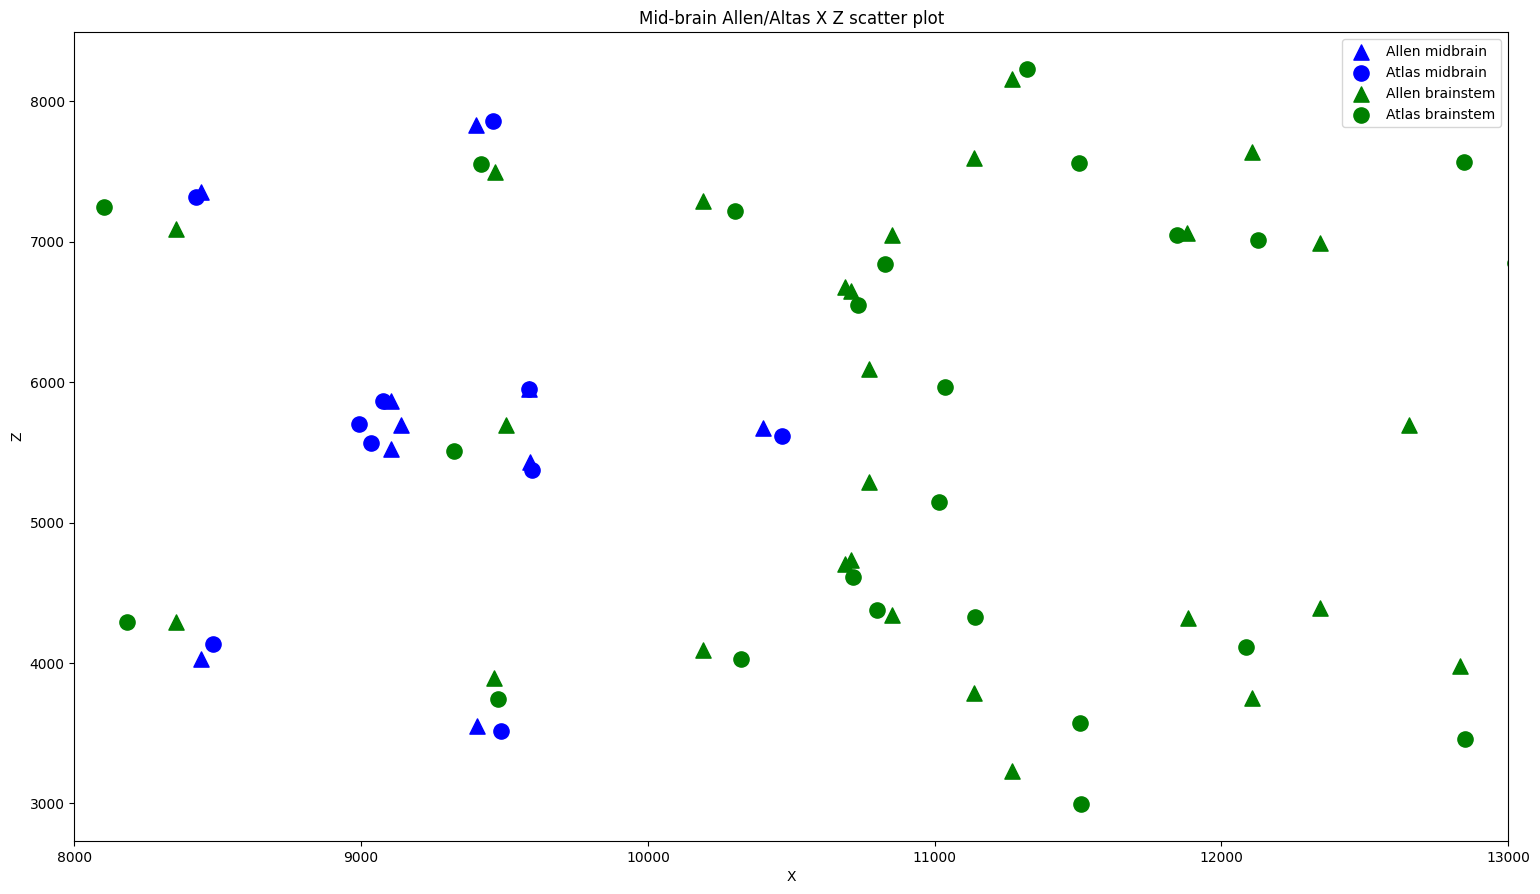

In [23]:
for color, label in zip('bgr', ['midbrain', 'brainstem']):
    allen_subset = df_midbrain_allen[df_midbrain_allen.area == label]
    atlas_subset = df_midbrain_atlas[df_midbrain_atlas.area == label]
    plt.scatter(allen_subset.X, allen_subset.Z, s=120, marker='^', c=color, label=str('Allen ' + label))
    plt.scatter(atlas_subset.X, atlas_subset.Z, s=120, marker='o', c=color, label=str('Atlas ' + label))
    plt.xlabel('X')
    plt.ylabel('Z')
    ax = plt.gca()
    ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    #ax.invert_yaxis()
plt.title('Mid-brain Allen/Altas X Z scatter plot')    
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

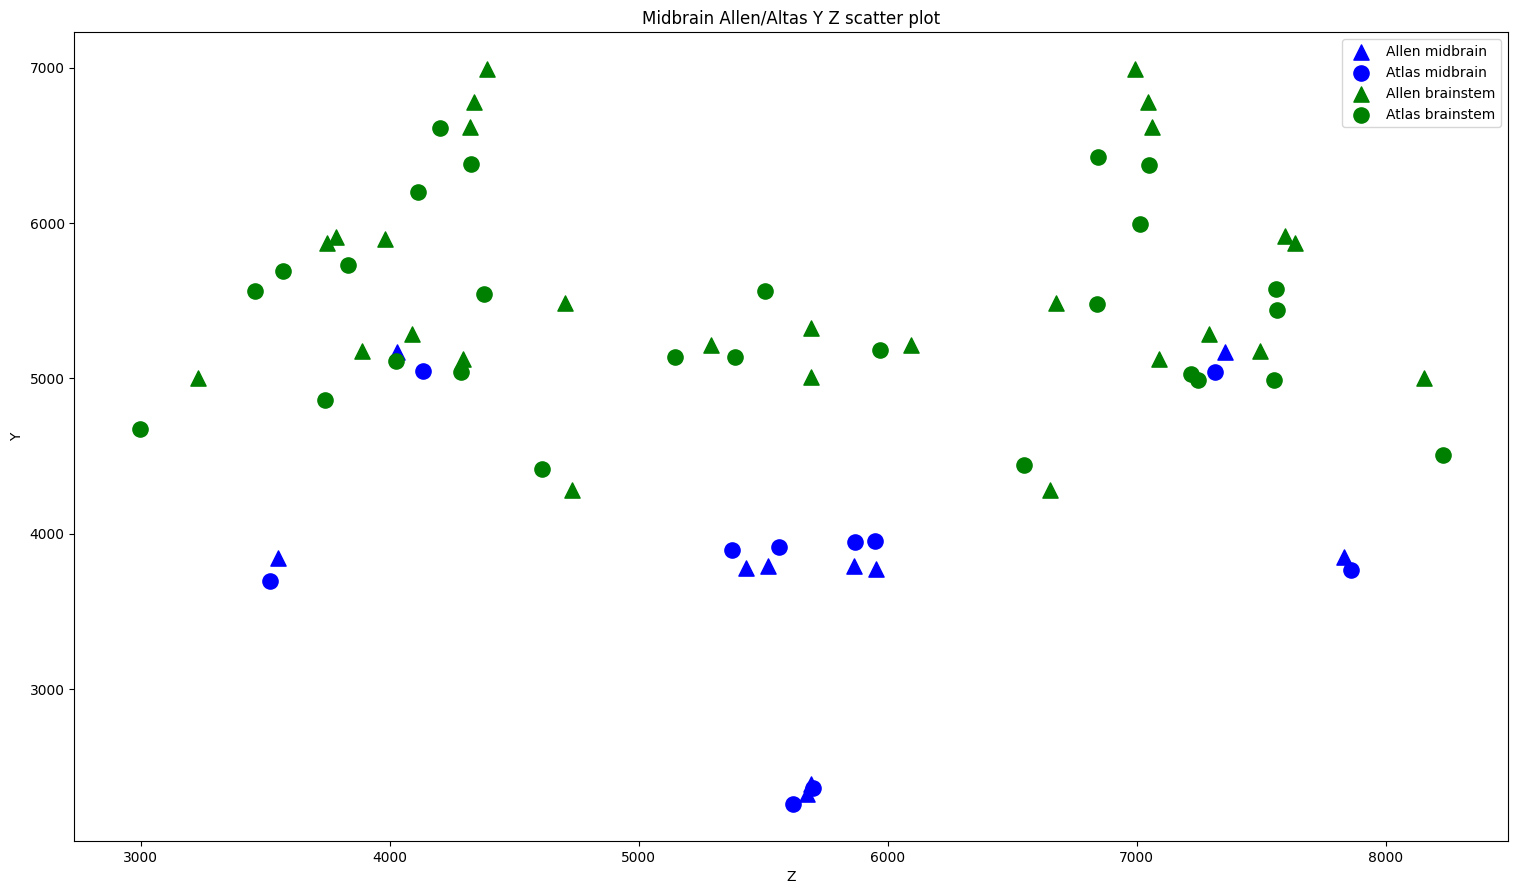

In [26]:
for color, label in zip('bgr', ['midbrain', 'brainstem']):
    allen_subset = df_midbrain_allen[df_midbrain_allen.area == label]
    atlas_subset = df_midbrain_atlas[df_midbrain_atlas.area == label]
    plt.scatter(allen_subset.Z, allen_subset.Y, s=120, marker='^', c=color, label=str('Allen ' + label))
    plt.scatter(atlas_subset.Z, atlas_subset.Y, s=120, marker='o', c=color, label=str('Atlas ' + label))
    plt.xlabel('Z')
    plt.ylabel('Y')
    ax = plt.gca()
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    ax.invert_yaxis()
plt.title('Midbrain Allen/Altas Y Z scatter plot')    
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [ ]:
for color, label in zip('bgr', ['Left', 'Right', 'Singular']):
    allen_subset = df_all_allen[df_all_allen.S == label]
    atlas_subset = df_all_atlas[df_all_atlas.S == label]
    plt.scatter(allen_subset.X, allen_subset.Y, s=120, marker='^', c=color, label=str('Allen ' + label))
    plt.scatter(atlas_subset.X, atlas_subset.Y, s=120, marker='o', c=color, label=str('Atlas ' + label))
    plt.xlabel('X')
    plt.ylabel('Y')
    ax = plt.gca()
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.invert_yaxis()
plt.title('All structures - Allen/Altas X Y scatter plot')    
plt.legend()
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

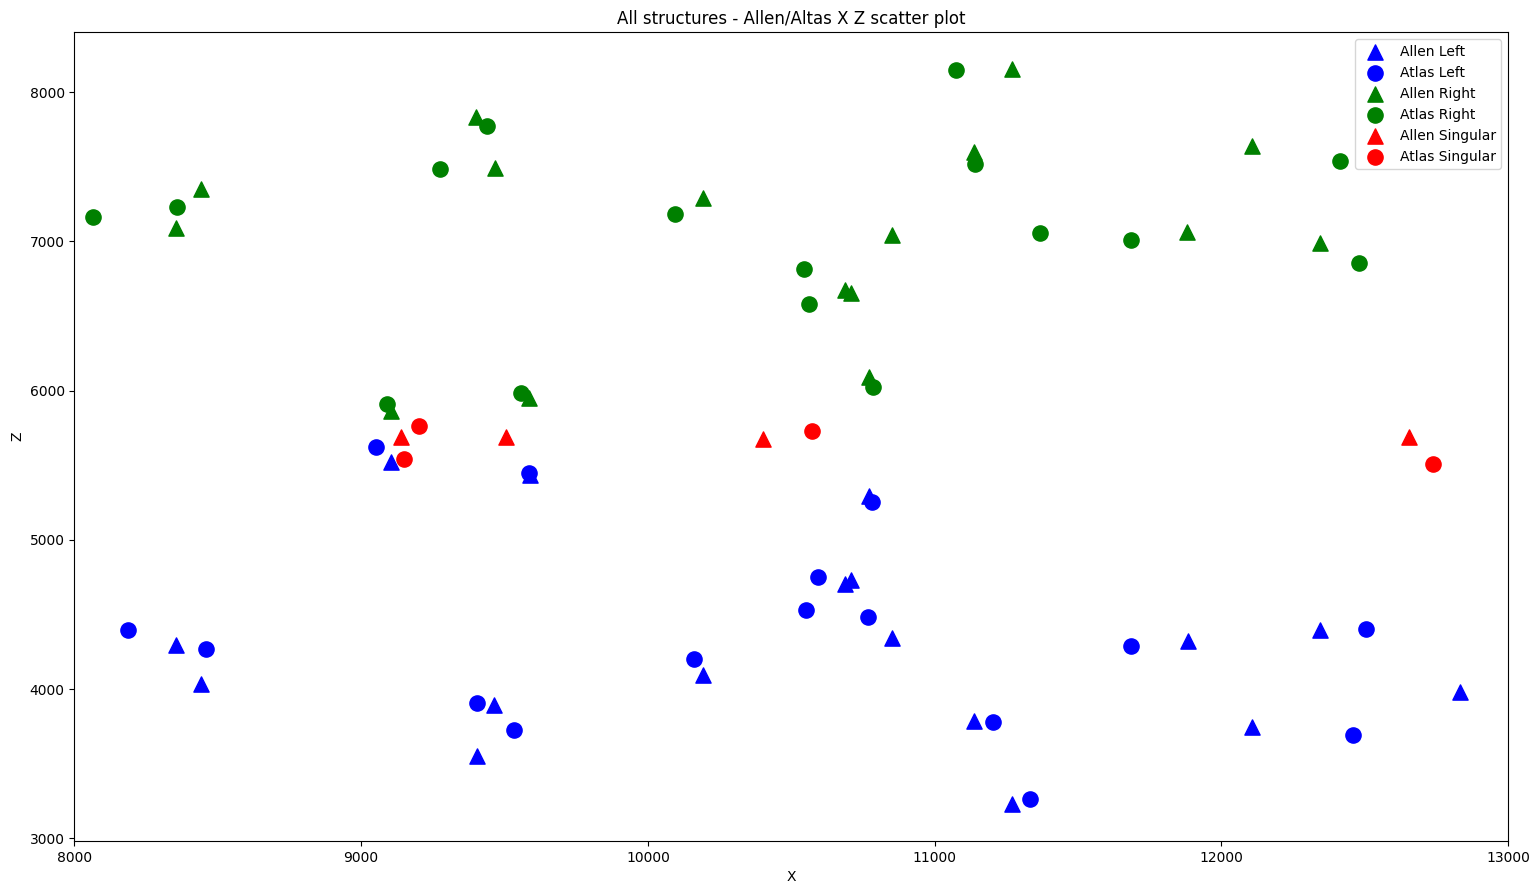

In [13]:
for color, label in zip('bgr', ['Left', 'Right', 'Singular']):
    allen_subset = df_all_allen[df_all_allen.S == label]
    atlas_subset = df_all_atlas[df_all_atlas.S == label]
    plt.scatter(allen_subset.X, allen_subset.Z, s=120, marker='^', c=color, label=str('Allen ' + label))
    plt.scatter(atlas_subset.X, atlas_subset.Z, s=120, marker='o', c=color, label=str('Atlas ' + label))
    plt.xlabel('X')
    plt.ylabel('Z')
    ax = plt.gca()
    ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    #ax.invert_yaxis()
plt.title('All structures - Allen/Altas X Z scatter plot')    
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [ ]:
for color, label in zip('bgr', ['Left', 'Right', 'Singular']):
    allen_subset = df_all_allen[df_all_allen.S == label]
    atlas_subset = df_all_atlas[df_all_atlas.S == label]
    plt.scatter(allen_subset.Z, allen_subset.Y, s=120, marker='^', c=color, label=str('Allen ' + label))
    plt.scatter(atlas_subset.Z, atlas_subset.Y, s=120, marker='o', c=color, label=str('Atlas ' + label))
    plt.xlabel('Z')
    plt.ylabel('Y')
    ax = plt.gca()
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    ax.invert_yaxis()
plt.title('All structures - Allen/Altas Y Z scatter plot')    
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [ ]:
# xy
for color, label in zip('bgr', ['Left', 'Right', 'Singular']):
    allen_subset = df_brainstem_allen[df_brainstem_allen.S == label]
    atlas_subset = df_brainstem_atlas[df_brainstem_atlas.S == label]
    plt.scatter(allen_subset.X, allen_subset.Y, s=120, marker='^', c=color, label=str('Allen ' + label))
    plt.scatter(atlas_subset.X, atlas_subset.Y, s=120, marker='o', c=color, label=str('Atlas ' + label))
    plt.xlabel('X')
    plt.ylabel('Y')
    ax = plt.gca()
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    ax.invert_yaxis()
plt.title('Brainstem Allen/Altas X Y scatter plot')    
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [ ]:
# xz
for color, label in zip('bgr', ['Left', 'Right', 'Singular']):
    allen_subset = df_brainstem_allen[df_brainstem_allen.S == label]
    atlas_subset = df_brainstem_atlas[df_brainstem_atlas.S == label]
    plt.scatter(allen_subset.X, allen_subset.Z, s=120, marker='^', c=color, label=str('Allen ' + label))
    plt.scatter(atlas_subset.X, atlas_subset.Z, s=120, marker='o', c=color, label=str('Atlas ' + label))
    plt.xlabel('X')
    plt.ylabel('Z')
    ax = plt.gca()
    ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    #ax.invert_yaxis()
plt.title('Brainstem Allen/Altas X Z scatter plot')    
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

In [ ]:
# yz
for color, label in zip('bgr', ['Left', 'Right', 'Singular']):
    allen_subset = df_brainstem_allen[df_brainstem_allen.S == label]
    atlas_subset = df_brainstem_atlas[df_brainstem_atlas.S == label]
    plt.scatter(allen_subset.Z, allen_subset.Y, s=120, marker='^', c=color, label=str('Allen ' + label))
    plt.scatter(atlas_subset.Z, atlas_subset.Y, s=120, marker='o', c=color, label=str('Atlas ' + label))
    plt.xlabel('Z')
    plt.ylabel('Y')
    ax = plt.gca()
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    ax.invert_yaxis()
plt.title('Brainstem Allen/Altas Y Z scatter plot')    
plt.legend()
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)